In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date =session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prv_year_date = dt.date(2017,8,23)-dt.timedelta(days=365)
prv_year_date
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= prv_year_date).all()
result
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df= pd.DataFrame(result,columns=("date","precipitation"))
df
# Sort the dataframe by date

df = df.sort_values("date")
df.reset_index()




,index,date,precipitation
0,0,2016-08-23,0.00
1,1009,2016-08-23,NaN
2,1529,2016-08-23,1.79
3,704,2016-08-23,0.05
4,361,2016-08-23,0.15
...,...,...,...
2225,1527,2017-08-22,0.00
2226,1008,2017-08-23,0.00
2227,360,2017-08-23,0.00
2228,1528,2017-08-23,0.08


Text(0.5, 1.0, 'Precipitation Data')

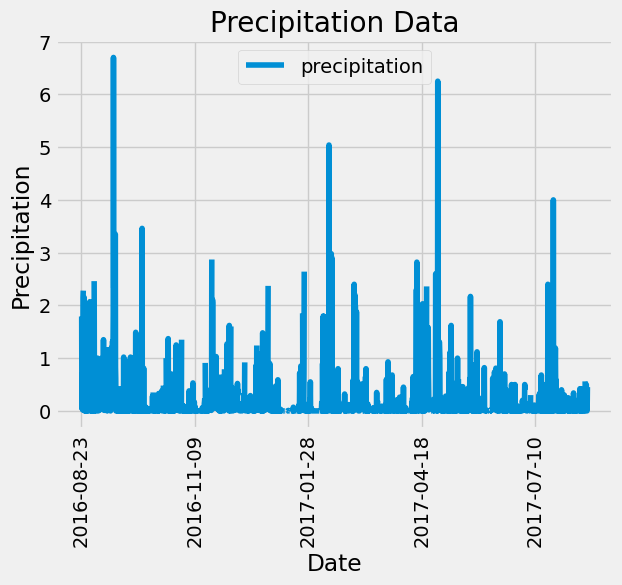

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Data")


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(func.count(Station.station)).all()
total_station

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query((Measurement.station),func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query((func.min(Measurement.tobs)),(func.max(Measurement.tobs)),(func.avg(Measurement.tobs))).\
filter((Measurement.station) == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

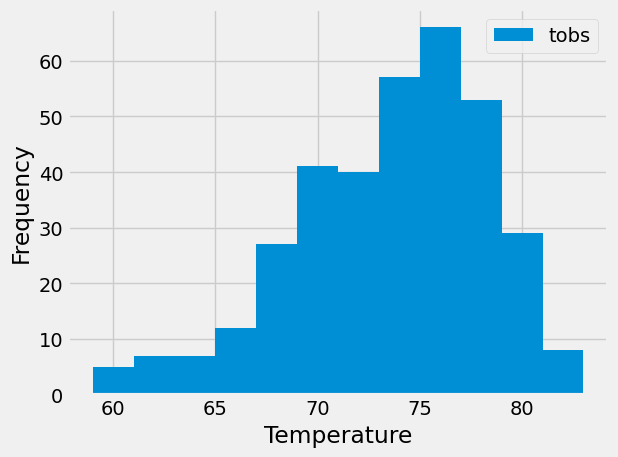

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

#calculating the most recent date and previous year date for the most active station ''USC00519281''
most_recent_date= session.query(func.max(Measurement.date)).all()
prev_year = dt.date(2017,8,23)-dt.timedelta(days=365)

#calculating the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).filter((Measurement.station) == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# coverting the result of last 12 months into a dataframe
df = pd.DataFrame(results,columns=['tobs'])

#plotting histogram
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close Session

In [18]:
# Close Session
session.close()